In [3]:
import numpy as np
import matplotlib.pyplot as plt
from random import uniform
from iminuit import Minuit
from iminuit.cost import LeastSquares

## GENERAZIONE UNIFORME DI EVENTI TRIDIMENSIONALI

In [4]:
def f(x, y):
    return np.exp(-x) * np.cos(y)

In [5]:
n = 1000

x = np.array([uniform(0, np.exp(1)) for i in range (n)])
y = np.array([uniform(-np.pi/2, np.pi/2) for i in range (n)])
z = f(x, y)

## CALCOLO INTEGRALE 3D CON HIT OR MISS

In [6]:
from myrand import generate_range

#CREO UNA FUNZIONE CHE GENERI MOLTI DATI IN 3 DIMENSIONI (SOTTOSTANTI ALLA FUNZIONE)

def integral_HOM3 (func, xMin, xMax, yMin, yMax, zMax, N_evt):
    x_coord = generate_range(xMin, xMax, N_evt)
    y_coord = generate_range(yMin, yMax, N_evt)
    z_coord = generate_range(0., zMax, N_evt)

    point_under = 0
    for x, y, z in zip (x_coord, y_coord, z_coord):
        if func(x, y) > z : point_under += 1

    Area_cubo = (xMax - xMin) * (yMax - yMin) * zMax
    frac = float (point_under) / float(N_evt)
    integral = Area_cubo * frac
    int_uncert = Area_cubo**2 * frac * (1 - frac) / N_evt
    
    return integral, int_uncert

In [7]:
Area, errore = integral_HOM3(f, 0, np.exp(1), -np.pi/2, np.pi/2, np.max(z), n)
print(f'area: {Area}, errore: {errore}')

area: 1.9304264684161518, errore: 0.012405688931257637


## 100 TOYS SUL CALCOLO DELL'INTEGRALE E ISTOGRAMMA ASSOCIATO

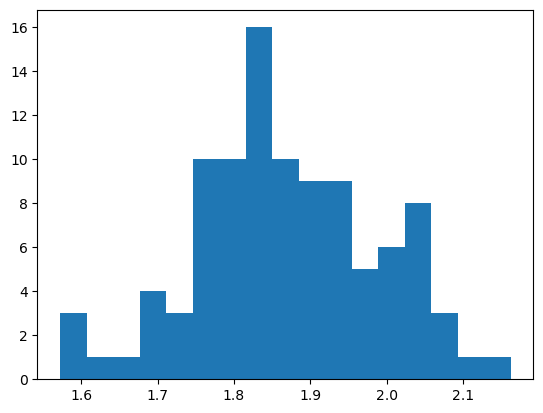

In [10]:
def sturges(N_evts):
    return int(np.ceil(1 + 3.322 * np.log(N_evts)))

n_toy = 100
integrale = []
for i in range (n_toy):
  x_coord = np.array([uniform(0, np.exp(1)) for b in range (n)])
  y_coord = np.array([uniform(-np.pi/2, np.pi/2) for b in range (n)])
  z_coord = f(x_coord, y_coord)
  integ, err = integral_HOM3(f, 0, np.exp(1), -np.pi/2, np.pi/2, np.max(z_coord), n)
  integrale.append(integ)

N_bins = sturges(n_toy)
bin_edges = np.linspace(np.min(integrale)-1, np.max(integrale), N_bins);
fig, ax = plt.subplots(nrows =1, ncols=1);
ax.hist(integrale, bins = N_bins);

## confronto gli errori

In [12]:
hist_err = np.std(integrale) / np.sqrt(n_toy)  #spostamento dei dati / numero dati
print(f'errore su area dato da istogramma: {hist_err}')
print(f'errore su area dato dalla funzione HOM: {errore}')

errore su area dato da istogramma: 0.01192272289373322
errore su area dato dalla funzione HOM: 0.012405688931257637


## studio l'evoluzione della precisione del calcolo in funzione del numero di eventi generati (usare scala logaritmica)

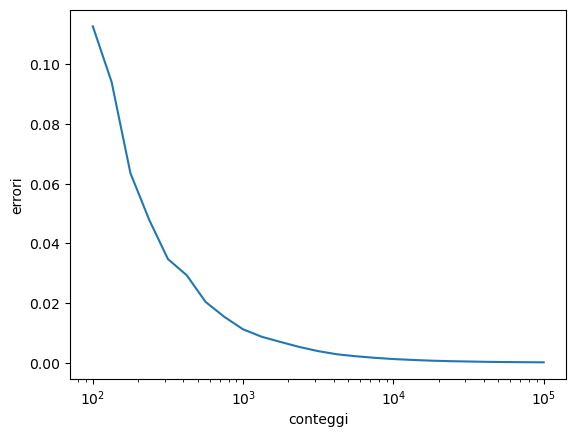

In [17]:
from math import floor

N_events = np.logspace(2, 5, num = 25)  #costruisco la scala logaritmica del numero di eventi
N_ev = N_events.astype(int)             #li rendo tutti numeri interi

integrals = []
int_uncertainties = []

for evt in N_ev:
    x_c = np.array([uniform(0, np.exp(1)) for i in range (n)])
    y_c = np.array([uniform(-np.pi/2, np.pi/2) for i in range (n)])
    z_c = f(x_c, y_c)
    integra, int_uncertain = integral_HOM3(f, 0, np.exp(1), -np.pi/2, np.pi/2, np.max(z_c), evt)
    integrals.append(integra)
    int_uncertainties.append(int_uncertain)

fig, ax = plt.subplots(nrows = 1, ncols = 1)
ax.errorbar(N_events, int_uncertainties)
ax.set_ylabel('errori')
ax.set_xlabel('conteggi')
ax.set_xscale('log')


Noto: con l'aumentare degli eventi la precisione migliora